In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [25]:
df = pd.read_csv(r"C:\Users\Atefah\Desktop\IRONHACK\lab-eda-bivariate\lab-eda-bivariate\amz_uk_price_prediction_dataset.csv")

In [26]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [27]:
# Create a crosstab between category and isBestSeller
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Calculate the proportion of best-sellers for each category
crosstab['proportion_best_seller'] = crosstab[True] / (crosstab[True] + crosstab[False])

# Sort the categories by the proportion of best-sellers in descending order
sorted_crosstab = crosstab.sort_values(by='proportion_best_seller', ascending=False)

# Display the sorted crosstab
sorted_crosstab

isBestSeller,False,True,proportion_best_seller
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [32]:
crosstab.rename(columns={False: 'FalseBS', True: 'TrueBS'}, inplace=True)
sorted_crosstab.rename(columns={False: 'FalseBS', True: 'TrueBS'}, inplace=True)
top_categories.rename(columns={False: 'FalseBS', True: 'TrueBS'}, inplace=True)

C:\Users\Atefah\AppData\Local\Temp\ipykernel_20552\3144850483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_categories.rename(columns={False: 'FalseBS', True: 'TrueBS'}, inplace=True)


In [36]:
sorted_crosstab

isBestSeller,FalseBS,TrueBS,proportion_best_seller
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [40]:

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab.iloc[:, :2])

# Print the results of the Chi-square test
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Compute Cramér's V
n = crosstab.values.sum()  # Total number of observations
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape[1] - 1, crosstab.shape[0] - 1))))

# Print Cramér's V
print(f"Cramér's V: {cramers_v}")

Chi-square statistic: 36540.20270061387
P-value: 0.0
Degrees of freedom: 295
Cramér's V: 0.08646706664522864


In [43]:
# Select the top 10 categories with the highest proportion of best-sellers
top_categories = sorted_crosstab.head(10)

In [45]:
print(sorted_crosstab[['TrueBS', 'FalseBS']].dtypes)

isBestSeller
TrueBS     int64
FalseBS    int64
dtype: object


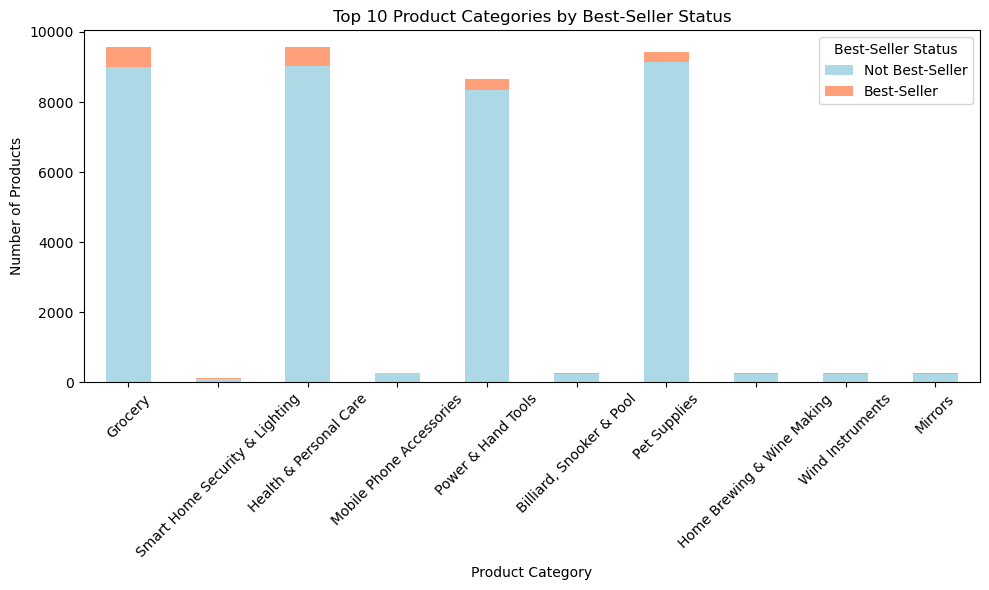

In [50]:
import matplotlib.pyplot as plt

# Select the top 10 categories for better visualization
top_categories = sorted_crosstab.head(10)

# Plot the stacked bar chart using renamed columns
top_categories[['FalseBS', 'TrueBS']].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#ADD8E6', '#FFA07A']  # Optional: light blue and salmon
)

# Customize plot appearance
plt.title('Top 10 Product Categories by Best-Seller Status')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.legend(title='Best-Seller Status', labels=['Not Best-Seller', 'Best-Seller'])

plt.tight_layout()
plt.show()



In [51]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

In [53]:

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Show how many rows were removed
print(f"Original dataset: {df.shape[0]} rows")
print(f"Cleaned dataset: {df_no_outliers.shape[0]} rows")
print(f"Removed outliers: {df.shape[0] - df_no_outliers.shape[0]} rows")


Original dataset: 2443651 rows
Cleaned dataset: 2115963 rows
Removed outliers: 327688 rows


In [54]:


# Get top 20 categories by number of products
top_20_categories = df_no_outliers['category'].value_counts().head(20).index

# Filter the dataset
df_top_categories = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]


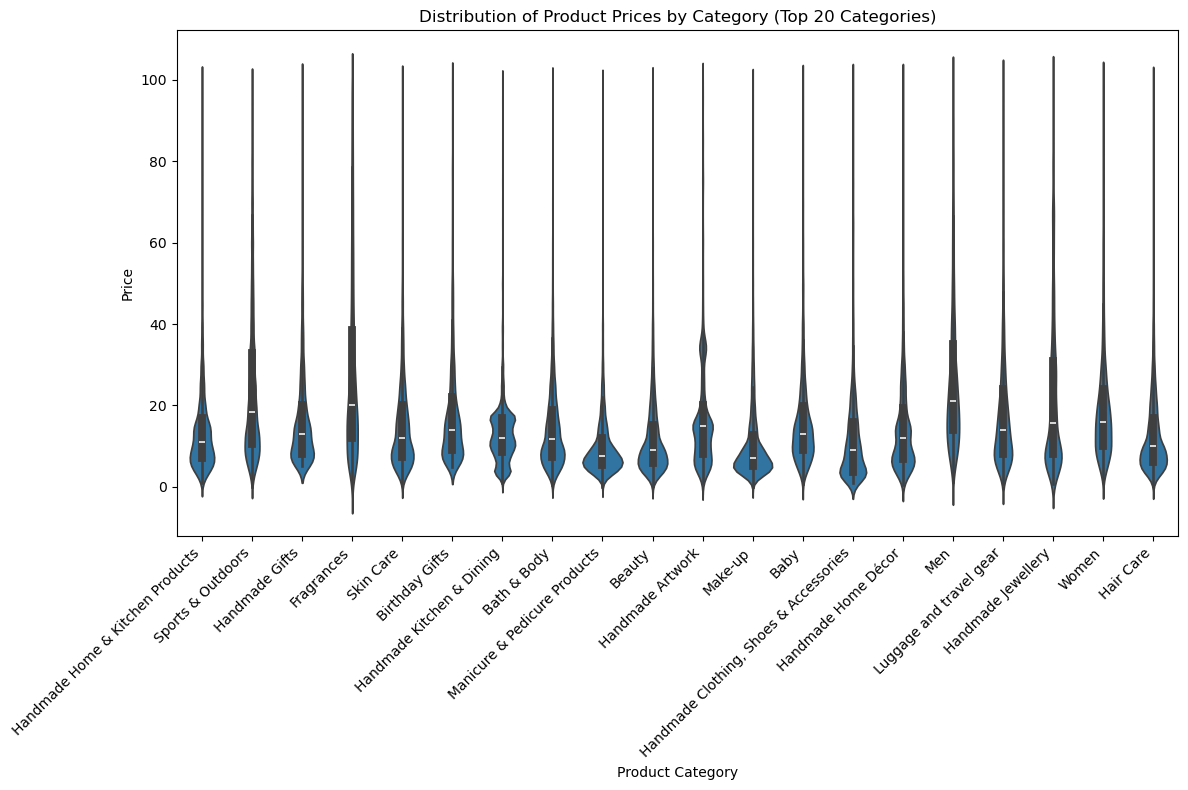

In [59]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_top_categories, x='category', y='price')

plt.title('Distribution of Product Prices by Category (Top 20 Categories)')
plt.xlabel('Product Category')
plt.ylabel('Price')

# Improve readability of x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate and align to right
plt.tight_layout()
plt.show()



In [60]:
# Calculate median price per category (no filtering)
median_prices = df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False)

# Show the category with highest median price
print("Category with highest median price:", median_prices.index[0])
print("Median price:", median_prices.iloc[0])


Category with highest median price: Desktop PCs
Median price: 74.0


In [61]:
# Get top 10 categories based on number of products
top_10_categories = df_no_outliers['category'].value_counts().head(10).index

# Filter DataFrame for top 10 categories
df_top10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Calculate average price per category
avg_price_top10 = df_top10.groupby('category')['price'].mean().sort_values(ascending=False)


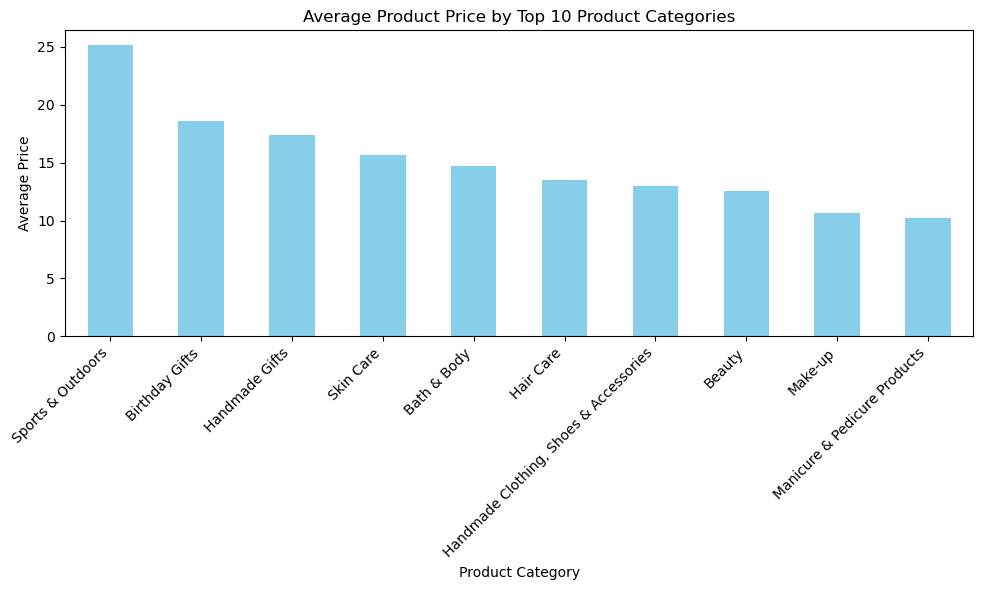

In [62]:


plt.figure(figsize=(10, 6))
avg_price_top10.plot(kind='bar', color='skyblue')
plt.title('Average Product Price by Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [63]:
# Get average price for all categories
avg_price_all = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False)

# Display highest
print("Category with highest average price:", avg_price_all.index[0])
print("Average price:", round(avg_price_all.iloc[0], 2))


Category with highest average price: Motherboards
Average price: 68.77


In [66]:
# Top 10 categories by number of products
top_10_categories = df_no_outliers['category'].value_counts().head(10).index

# Filter dataset
df_top10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]


In [72]:
df_top10 

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


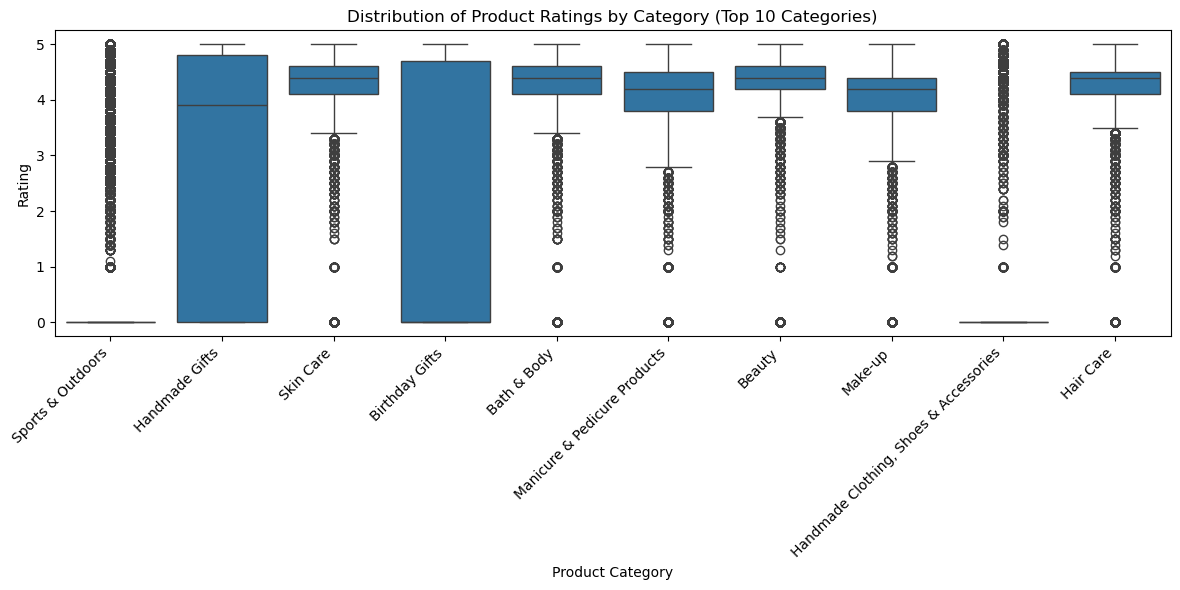

In [74]:


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top10, x='category', y='stars')

plt.title('Distribution of Product Ratings by Category (Top 10 Categories)')
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [75]:
# Calculate median rating per category across all data
median_ratings = df_no_outliers.groupby('category')['stars'].median().sort_values(ascending=False)

# Show category with highest median rating
print("Category with highest median rating:", median_ratings.index[0])
print("Median rating:", round(median_ratings.iloc[0], 2))


Category with highest median rating: Computer Memory
Median rating: 4.7


In [76]:
# First, ensure the 'price' and 'rating' (or 'stars') columns exist and have numeric values
df_clean = df[['price', 'stars']].dropna()

# Pearson correlation
pearson_corr = df_clean['price'].corr(df_clean['stars'], method='pearson')

# Spearman correlation (for non-parametric or ranked correlation)
spearman_corr = df_clean['price'].corr(df_clean['stars'], method='spearman')

# Print results
print(f"Pearson Correlation between price and rating: {pearson_corr:.3f}")
print(f"Spearman Correlation between price and rating: {spearman_corr:.3f}")


Pearson Correlation between price and rating: -0.125
Spearman Correlation between price and rating: -0.133


✅ Interpretation
Correlation values range from -1 to 1:

+1: Perfect positive correlation

-1: Perfect negative correlation

0: No correlation

Common thresholds:

|r| < 0.3: Weak

0.3 ≤ |r| < 0.7: Moderate

|r| ≥ 0.7: Strong

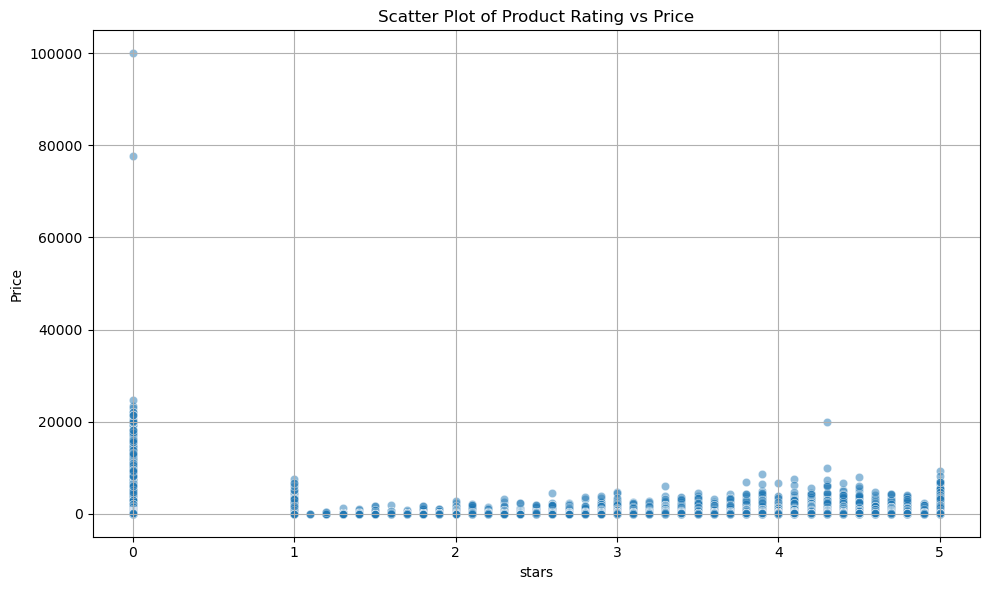

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='stars', y='price', alpha=0.5)
plt.title('Scatter Plot of Product Rating vs Price')
plt.xlabel('stars')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

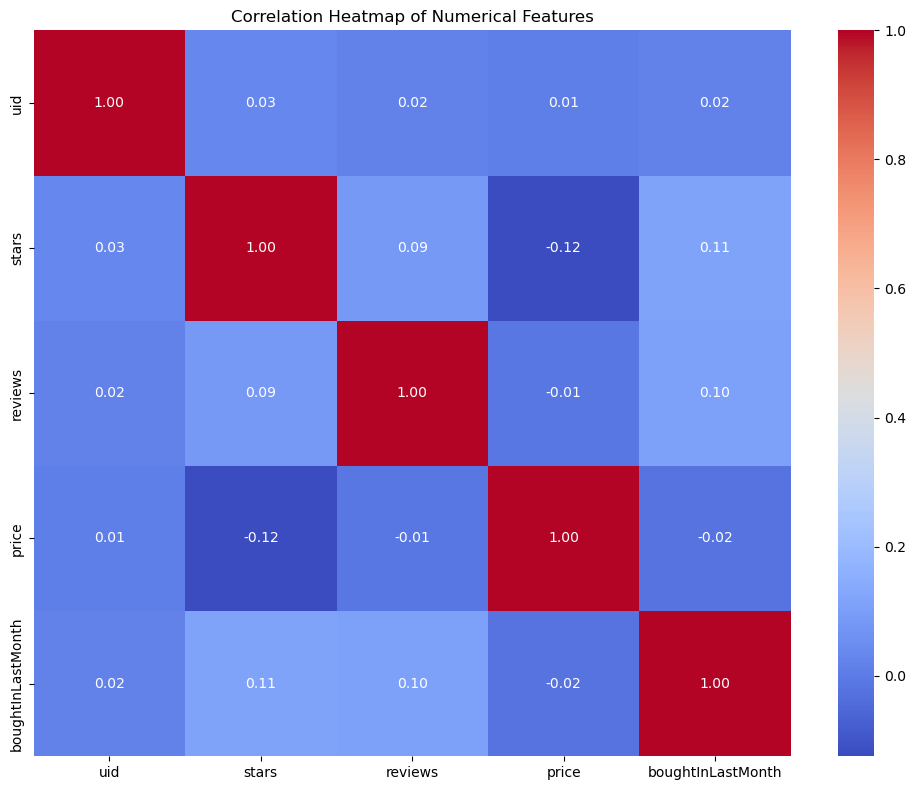

In [82]:
# Compute correlation matrix (only for numeric columns)
corr = df.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


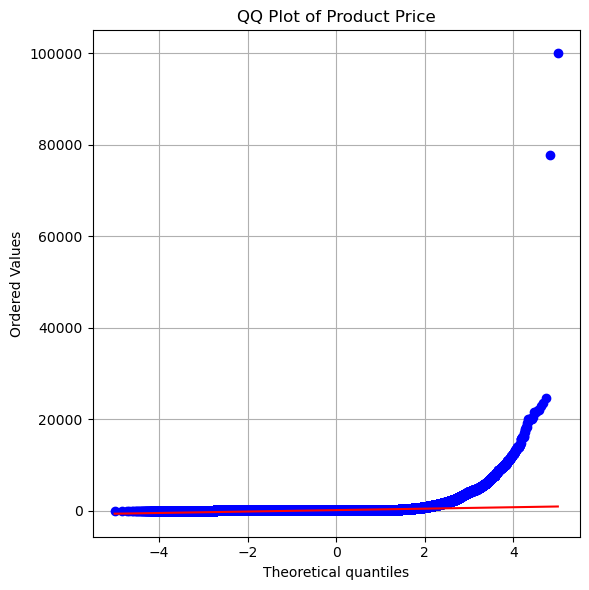

In [83]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Drop missing prices and sort
price_data = df['price'].dropna()

# QQ plot
plt.figure(figsize=(6, 6))
stats.probplot(price_data, dist="norm", plot=plt)
plt.title("QQ Plot of Product Price")
plt.grid(True)
plt.tight_layout()
plt.show()
